In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
pd.set_option('display.max_row',10000)
pd.set_option('display.max_columns',40)

In [4]:
df = pd.read_csv('Dados/data_tratado.csv',sep=';')
df.loc[:,'DT_MEDICAO'] =  pd.to_datetime(df.loc[:,'DT_MEDICAO'], format='%Y-%m-%d')

In [5]:
def tirando_horas_sem_radiacao(df):
    condicao_irradiacao = (df.HORA<=18) & (df.HORA>=5)
    df = df[condicao_irradiacao]
    return df
df = tirando_horas_sem_radiacao(df)

In [6]:
df.head()

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,VEN_DIR,DT_MEDICAO,CHUVA,PRE_MIN,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,VEN_RAJ,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO,HORA,RAD
8,SAO PAULO - MIRANTE,924.2,24.8,-23.496294,924.2,SP,-3.540,17.0,23.9,-46.620088,64.0,17.1,11.0,2015-01-01,0.0,923.7,65.0,0.5,16.8,24.1,3.1,24.0,65.0,A701,800,5,0.000
9,SAO PAULO - MIRANTE,924.4,24.7,-23.496294,924.4,SP,115.361,16.9,23.8,-46.620088,62.0,17.0,344.0,2015-01-01,0.0,924.2,65.0,1.3,16.8,24.6,3.5,24.6,62.0,A701,900,6,115.361
10,SAO PAULO - MIRANTE,924.9,26.5,-23.496294,924.9,SP,732.567,17.6,24.4,-46.620088,59.0,18.3,278.0,2015-01-01,0.0,924.4,64.0,0.5,16.8,26.4,3.2,25.9,60.0,A701,1000,7,732.567
11,SAO PAULO - MIRANTE,925.5,23.7,-23.496294,925.5,SP,1597.737,16.7,25.8,-46.620088,55.0,17.9,318.0,2015-01-01,0.0,924.9,61.0,3.6,16.5,26.6,6.7,26.4,55.0,A701,1100,8,1597.737
12,SAO PAULO - MIRANTE,925.4,28.3,-23.496294,925.5,SP,2405.176,18.1,26.2,-46.620088,52.0,18.1,348.0,2015-01-01,0.0,925.4,56.0,1.6,16.5,28.4,8.9,28.4,54.0,A701,1200,9,2405.176


In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [8]:
ts=df[['DT_MEDICAO','RAD','UMD_MAX','CHUVA']]
ts=ts.groupby('DT_MEDICAO')['RAD','UMD_MAX','CHUVA'].mean()

In [9]:
ts

,RAD,UMD_MAX,CHUVA
DT_MEDICAO,,,
2015-01-01,2012.335857,51.500000,0.000000
2015-01-02,1529.443571,51.285714,0.014286
2015-01-03,998.775929,73.500000,0.100000
2015-01-04,973.029000,71.000000,0.000000
2015-01-05,1036.097214,78.357143,0.900000
2015-01-06,1564.265000,65.785714,0.000000
2015-01-07,1705.772786,62.928571,1.214286
2015-01-08,2058.847143,59.571429,0.314286
2015-01-09,2064.075143,52.000000,0.000000


In [10]:
ts['day'] = ts.index.day
ts['dayofyear'] = ts.index.dayofyear
ts['weekday'] = ts.index.weekday
ts['weekofyear'] = ts.index.weekofyear

ts['month'] = ts.index.month
ts['is_month_start'] = ts.index.is_month_start
ts['is_month_end'] = ts.index.is_month_end

ts['year'] = ts.index.year
ts['is_year_start'] = ts.index.is_year_start
ts['ano_fim'] = ts.index.is_year_end

ts['quarter'] = ts.index.quarter
ts['quarter_comeco'] = ts.index.is_quarter_start
ts['quarter_fim'] = ts.index.is_quarter_end

ts['ts_lag1'] = ts.RAD.shift()

ts = ts.dropna()

In [11]:
ts

,RAD,UMD_MAX,CHUVA,day,dayofyear,weekday,weekofyear,month,is_month_start,is_month_end,year,is_year_start,ano_fim,quarter,quarter_comeco,quarter_fim,ts_lag1
DT_MEDICAO,,,,,,,,,,,,,,,,,
2015-01-02,1529.443571,51.285714,0.014286,2,2,4,1,1,False,False,2015,False,False,1,False,False,2012.335857
2015-01-03,998.775929,73.500000,0.100000,3,3,5,1,1,False,False,2015,False,False,1,False,False,1529.443571
2015-01-04,973.029000,71.000000,0.000000,4,4,6,1,1,False,False,2015,False,False,1,False,False,998.775929
2015-01-05,1036.097214,78.357143,0.900000,5,5,0,2,1,False,False,2015,False,False,1,False,False,973.029000
2015-01-06,1564.265000,65.785714,0.000000,6,6,1,2,1,False,False,2015,False,False,1,False,False,1036.097214
2015-01-07,1705.772786,62.928571,1.214286,7,7,2,2,1,False,False,2015,False,False,1,False,False,1564.265000
2015-01-08,2058.847143,59.571429,0.314286,8,8,3,2,1,False,False,2015,False,False,1,False,False,1705.772786
2015-01-09,2064.075143,52.000000,0.000000,9,9,4,2,1,False,False,2015,False,False,1,False,False,2058.847143
2015-01-10,1802.627357,49.214286,0.000000,10,10,5,2,1,False,False,2015,False,False,1,False,False,2064.075143


In [12]:
X = ts.drop('RAD', axis=1)
y = ts['RAD']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

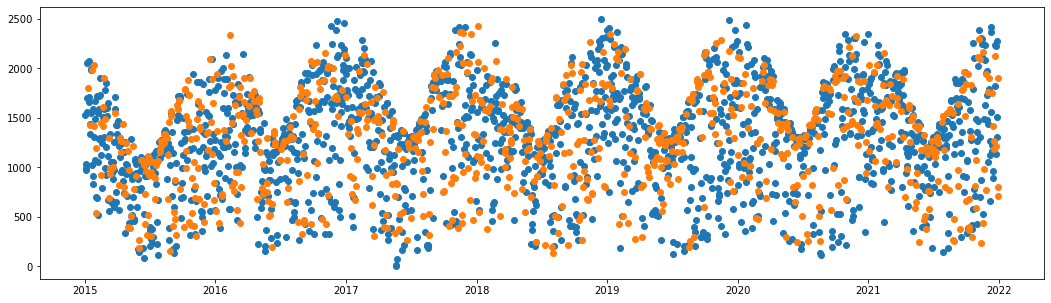

In [14]:
plt.figure(figsize=(18, 5))
plt.scatter(y_train.index, y_train)
plt.scatter(y_test.index, y_test);

In [15]:
# Define pipeline
pipe = Pipeline([('minmax', MinMaxScaler()),
                    ('dtr_regr', DecisionTreeRegressor(max_depth=5))])

In [16]:
# Ajusta o modelo nos dados de treino
from sklearn import set_config
set_config(display='diagram')

pipe.fit(X_train, y_train)

Pipeline(steps=[('minmax', MinMaxScaler()),
                ('dtr_regr', DecisionTreeRegressor(max_depth=5))])

In [17]:
#X_test = X_test[['UMD_MIN', 'TEM_MAX']]
y_pred = pipe.predict(X_test)

In [18]:
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
results.sort_index(inplace=True)

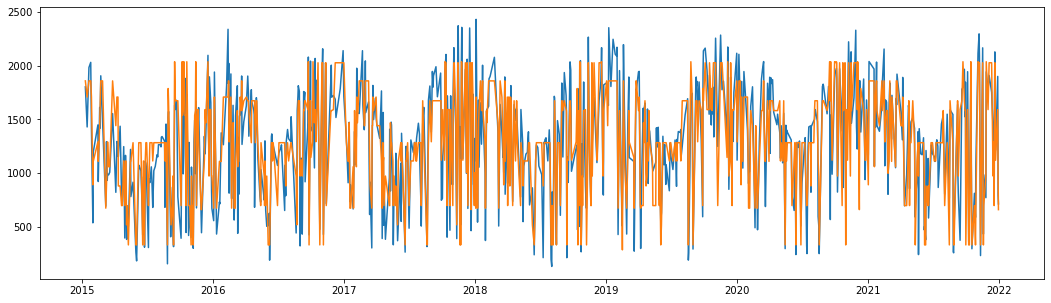

In [19]:
plt.figure(figsize=(18, 5))
plt.plot(results.index, results.y_test);
plt.plot(results.index, results.y_pred, c='C1');

In [20]:
pipe.score(X_test, y_test)

0.7210154758180555

In [21]:
pipe.score(X_train, y_train)

0.7932219331372111

In [22]:
y_hat = pipe.predict(X_train)
results=pd.DataFrame({'y_train':y_train,'y_hat':y_hat})
results.sort_index(inplace=True)
results.head()

,y_train,y_hat
DT_MEDICAO,,
2015-01-02,1529.443571,1858.160898
2015-01-03,998.775929,1110.298277
2015-01-04,973.029000,1442.009583
2015-01-05,1036.097214,1060.642671
2015-01-06,1564.265000,1708.013567


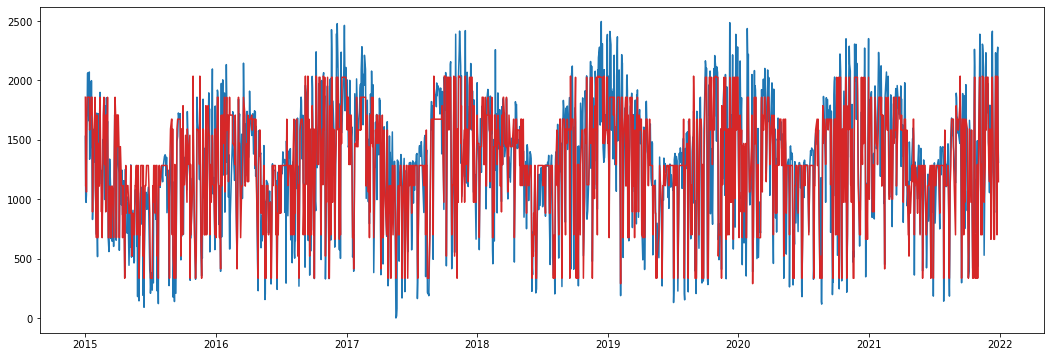

In [23]:
plt.figure(figsize=(18, 6))
plt.plot(results.index, results.y_train);
plt.plot(results.index, results.y_hat, c='C3');

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred,squared=False)

268.0646780904532

In [25]:
mean_squared_error(y_train, y_hat,squared=False)

236.8348774985571

In [27]:
# Cálculo do coeficiente de determinação R2
r2_score(y_test,y_pred)

0.7210154758180555